In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
random.seed(10)

N = 100000
lamda = 0.8
mu = 1
rho = lamda/mu
E_N_MM1 = lamda*(1/(mu-lamda))
E_N_MD1 = lamda*((1/mu)+(rho/(2*mu*(1-rho))))

# 1. M/M/1

In [39]:
def generate_random_exponential(x):
    return -(1/x)*np.log(np.random.rand())

In [50]:
IAT = [0] + [generate_random_exponential(lamda) for i in range(N)]
ST = [0] + [generate_random_exponential(mu) for i in range(N)]
GSAT = [0]
LSAT = [0]

data = pd.DataFrame(IAT, columns=['IAT'])
data['JQAT'] = data['IAT'].cumsum()
data['ST'] = pd.DataFrame(ST)

JQAT = list(data.JQAT)
for i in range(1, data.shape[0]):
    if LSAT[i-1] < JQAT[i]:
        GSAT.append(JQAT[i])
    else:
        GSAT.append(LSAT[i-1])
    LSAT.append(ST[i] + GSAT[i])
    
data['GSAT'] = pd.DataFrame(GSAT)
data['LSAT'] = pd.DataFrame(LSAT)
data['TSIS'] = data['LSAT'] - data['JQAT']
data['TQIS'] = data['TSIS'] - data['ST']
data['IAT-ave'] = 0
data['TSIS-ave'] = 0
data['IAT-ave'].iloc[1:] = data['IAT'].iloc[1:].expanding().mean()
data['TSIS-ave'].iloc[1:] = data['TSIS'].iloc[1:].expanding().mean()
data['E[N]'] = data['TSIS-ave']*lamda

data.round(4).head()

,IAT,JQAT,ST,GSAT,LSAT,TSIS,TQIS,IAT-ave,TSIS-ave,E[N]
0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.7700,1.7700,4.3630,1.7700,6.1330,4.3630,0.0000,1.7700,4.3630,3.4904
2,0.6473,2.4173,2.2577,6.1330,8.3907,5.9733,3.7157,1.2087,5.1682,4.1345
3,0.7324,3.1497,0.0010,8.3907,8.3917,5.2419,5.2409,1.0499,5.1928,4.1542
4,2.5976,5.7474,1.2744,8.3917,9.6661,3.9187,2.6443,1.4368,4.8742,3.8994


Text(0.5, 0, 'Number of Events')

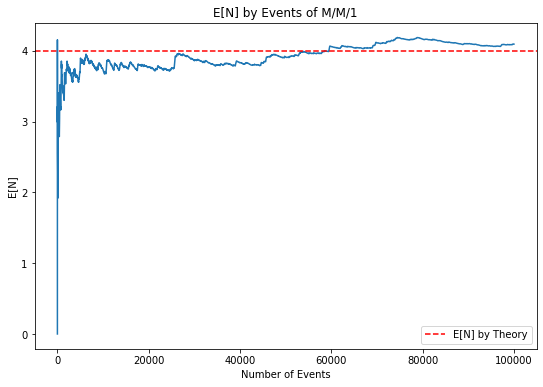

In [51]:
plt.figure(figsize=[9,6])
sns.lineplot(data.index, 
             data["E[N]"])
line = plt.axhline(E_N_MM1, 
                   color="r", 
                   linestyle="--", 
                   label = "E[N] by Theory")
first_legend = plt.legend(handles=[line], 
                          loc='best')

plt.title("E[N] by Events of M/M/1", 
          fontsize=12, 
          fontfamily='sans serif')
plt.ylabel("E[N]", 
           fontsize=10, 
           fontfamily='sans serif')
plt.xlabel("Number of Events", 
           fontsize=10, 
           fontfamily='sans serif')

# 2. M/D/1

In [42]:
IAT = [0] + [generate_random_exponential(lamda) for i in range(N)]
ST = [0] + [1/mu for i in range(N)]
GSAT = [0]
LSAT = [0]

data = pd.DataFrame(IAT, columns=['IAT'])
data['JQAT'] = data['IAT'].cumsum()
data['ST'] = pd.DataFrame(ST)

JQAT = list(data.JQAT)
for i in range(1, data.shape[0]):
    if LSAT[i-1] < JQAT[i]:
        GSAT.append(JQAT[i])
    else:
        GSAT.append(LSAT[i-1])
    LSAT.append(ST[i] + GSAT[i])
    
data['GSAT'] = pd.DataFrame(GSAT)
data['LSAT'] = pd.DataFrame(LSAT)
data['TSIS'] = data['LSAT'] - data['JQAT']
data['TQIS'] = data['TSIS'] - data['ST']
data['IAT-ave'] = 0
data['TSIS-ave'] = 0
data['IAT-ave'].iloc[1:] = data['IAT'].iloc[1:].expanding().mean()
data['TSIS-ave'].iloc[1:] = data['TSIS'].iloc[1:].expanding().mean()
data['E[N]'] = data['TSIS-ave']*lamda

data.round(4).head()

,IAT,JQAT,ST,GSAT,LSAT,TSIS,TQIS,IAT-ave,TSIS-ave,E[N]
0,0.0000,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0000,0.0,0.0
1,1.1756,1.1756,1.0,1.1756,2.1756,1.0,0.0,1.1756,1.0,0.8
2,2.4783,3.6538,1.0,3.6538,4.6538,1.0,-0.0,1.8269,1.0,0.8
3,3.7561,7.4099,1.0,7.4099,8.4099,1.0,0.0,2.4700,1.0,0.8
4,1.7648,9.1747,1.0,9.1747,10.1747,1.0,0.0,2.2937,1.0,0.8


Text(0.5, 0, 'Number of Events')

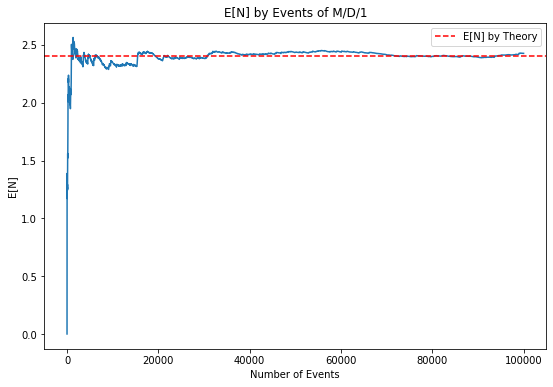

In [43]:
plt.figure(figsize=[9,6])
sns.lineplot(data.index, 
             data["E[N]"])
line = plt.axhline(E_N_MD1, 
                   color="r", 
                   linestyle="--", 
                   label = "E[N] by Theory")
first_legend = plt.legend(handles=[line], 
                          loc='best')

plt.title("E[N] by Events of M/D/1", 
          fontsize=12, 
          fontfamily='sans serif')
plt.ylabel("E[N]", 
           fontsize=10, 
           fontfamily='sans serif')
plt.xlabel("Number of Events", 
           fontsize=10, 
           fontfamily='sans serif')